# Aula 10: Introdução a Machine Learning

### O que é Machine Learning? Como funciona?

Entender melhor como funciona a construção de um modelo preditivo

Imaginem que queiramos prever o tipo de uma flor e que tenhamos os seguintes dados:

   Variáveis:
       - sepal length in cm
       - sepal width in cm
       - petal length in cm
       - petal width in cm
   
   Classes:
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica



<img src="Petal-sepal.jpg" width="400" height="100">

In [1]:
import os
import pandas as pd

from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

In [3]:
data_file = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(data_file, names=names)

In [4]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset.sample(n=20)

,sepal-length,sepal-width,petal-length,petal-width,class
75,6.6,3.0,4.4,1.4,Iris-versicolor
89,5.5,2.5,4.0,1.3,Iris-versicolor
142,5.8,2.7,5.1,1.9,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica


Tamanho da base de dados:

In [12]:
dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].iloc[77]

sepal-length    6.7
sepal-width     3.0
petal-length    5.0
petal-width     1.7
Name: 77, dtype: float64

In [ ]:
CHUTE: Iris-Versicolor (ANDRE)

In [4]:
print("Tamanho:", len(dataset))

Tamanho: 150


### Descrição dos dados

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Observações por tipo de flores:

In [7]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
dummie_class = pd.get_dummies(dataset['class'],prefix='class')

In [15]:
dummie_class

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [16]:
Y = dummie_class["class_Iris-versicolor"]

In [18]:
Y.sample(n=10)

145    0
106    0
87     1
47     0
123    0
100    0
33     0
99     1
96     1
39     0
Name: class_Iris-versicolor, dtype: uint8

In [19]:
X = dataset[["sepal-length","sepal-width","petal-length","petal-width"]]
X = sm.add_constant(X)

In [20]:
X

,const,sepal-length,sepal-width,petal-length,petal-width
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1.0,6.7,3.0,5.2,2.3
146,1.0,6.3,2.5,5.0,1.9
147,1.0,6.5,3.0,5.2,2.0
148,1.0,6.2,3.4,5.4,2.3


In [21]:
probit_mod = sm.Probit(Y, X)

In [22]:
probit_res = probit_mod.fit()

         Current function value: 0.000000
         Iterations: 35


/Users/gustavorsampaio/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
print(probit_res.summary2())

                              Results: Probit
Model:                Probit                 Pseudo R-squared:  inf        
Dependent Variable:   class_Iris-versicolor  AIC:               10.0000    
Date:                 2021-02-03 14:55       BIC:               25.0532    
No. Observations:     150                    Log-Likelihood:    -4.9405e-14
Df Model:             4                      LL-Null:           0.0000     
Df Residuals:         145                    LLR p-value:       1.0000     
Converged:            0.0000                 Scale:             1.0000     
No. Iterations:       35.0000                                              
---------------------------------------------------------------------------
             Coef.    Std.Err.     z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------
const        6.4661 7386142.4674 0.0000 1.0000 -14476566.7548 14476579.6870
sepal-length 0.1480 2390924.7149 0.0000 1.

/Users/gustavorsampaio/miniforge3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [25]:
print(probit_res.get_margeff(at='overall', method='dydx').summary())

        Probit Marginal Effects         
Dep. Variable:     class_Iris-versicolor
Method:                             dydx
At:                              overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal-length  2.433e-14   1.19e-06   2.05e-08      1.000   -2.33e-06    2.33e-06
sepal-width   3.536e-15   3.91e-07   9.05e-09      1.000   -7.66e-07    7.66e-07
petal-length  8.099e-15   6.17e-07   1.31e-08      1.000   -1.21e-06    1.21e-06
petal-width   5.126e-14   3.18e-06   1.61e-08      1.000   -6.23e-06    6.23e-06


In [26]:
X

,const,sepal-length,sepal-width,petal-length,petal-width
0,1.0,5.1,3.5,1.4,0.2
1,1.0,4.9,3.0,1.4,0.2
2,1.0,4.7,3.2,1.3,0.2
3,1.0,4.6,3.1,1.5,0.2
4,1.0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,1.0,6.7,3.0,5.2,2.3
146,1.0,6.3,2.5,5.0,1.9
147,1.0,6.5,3.0,5.2,2.0
148,1.0,6.2,3.4,5.4,2.3


In [28]:
predictions = probit_res.predict(X)
print(predictions[15:25])

15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
dtype: float64


In [29]:
Y[15:25]

15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
Name: class_Iris-versicolor, dtype: uint8

In [30]:
predictions = probit_res.predict([[1,7.6,5.4,3.2,2.8]])
print(predictions)

[1.]


Observar comportamento dos dados:

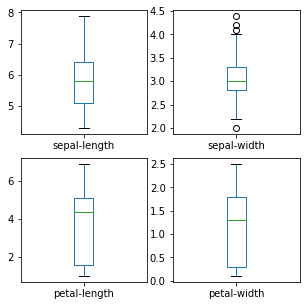

In [24]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(5, 5))
plt.show()

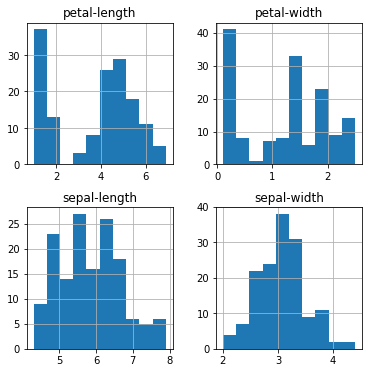

In [41]:
dataset.hist(figsize=(6, 6))
plt.show()

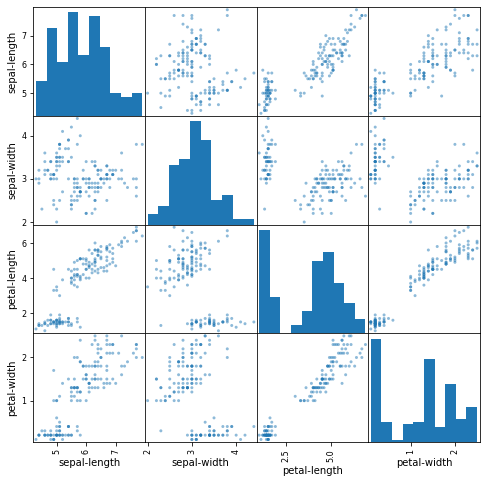

In [25]:
scatter_matrix(dataset, figsize=(8, 8))
plt.show()

### Preparar dados para estimar o modelo

In [31]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
dataset.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [33]:
array = dataset.values

In [26]:
array

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [34]:
X = array[:,0:4]

In [35]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
Y = array[:,4]

In [40]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [41]:
y_train = Y[0:120]

In [42]:
len(y_train)

120

In [43]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [34]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

In [35]:
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [36]:
print("Treinamento")
print("    Tamanho X_train:", len(X_train))
print("    Tamanho Y_train:", len(Y_train))
print("Validação")
print("    Tamanho X_validation:", len(X_validation))
print("    Tamanho Y_validation:", len(Y_validation))

Treinamento
    Tamanho X_train: 120
    Tamanho Y_train: 120
Validação
    Tamanho X_validation: 30
    Tamanho Y_validation: 30


### Treinar Modelo

In [51]:
svm = SVC(probability=True)
#svm = SVC()
svm.fit(X_train, Y_train)

SVC(probability=True)

In [53]:
svm

SVC(probability=True)

### Realizar previsão

In [54]:
predictions = svm.predict(X_validation)
print(predictions)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


Vamos ver o que era cada uma delas na verdade:

In [45]:
print(Y_validation)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']


Podemos observar a taxa de acerto comparando os dois resultados:

In [46]:
print(accuracy_score(Y_validation, predictions))

0.8666666666666667


In [60]:
svm.predict([[6.1 , 4, 2.5, 1.5]])

array(['Iris-setosa'], dtype=object)

In [59]:
svm.predict_proba([[6.1 , 4, 2.5, 1.5]])

array([[0.55563557, 0.38553256, 0.05883187]])

E calcular a matrix de cofusão:

In [48]:
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
cm = confusion_matrix(Y_validation, predictions)
print(cm)

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


Também observando graficamente:

<ipython-input-51-785942da2e5d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] +labels)
<ipython-input-51-785942da2e5d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


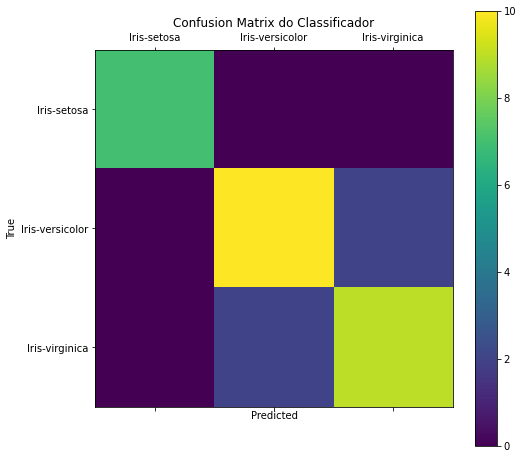

In [51]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("Confusion Matrix do Classificador")
fig.colorbar(cax)
ax.set_xticklabels([''] +labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Finalmente, podemos observar as probabilidades associadas a cada uma das observações:

In [52]:
probs = svm.predict_proba(X_validation)
print(probs)

[[0.01339742 0.14870855 0.83789404]
 [0.00960173 0.89276698 0.09763129]
 [0.97623109 0.01480664 0.00896227]
 [0.00883226 0.90141577 0.08975197]
 [0.01396352 0.75776806 0.22826842]
 [0.92159701 0.06283815 0.01556484]
 [0.01180081 0.67516734 0.31303185]
 [0.00776482 0.97997993 0.01225526]
 [0.964329   0.02510422 0.01056678]
 [0.01026807 0.9185143  0.07121763]
 [0.01202838 0.34651799 0.64145364]
 [0.01252981 0.8687502  0.11871999]
 [0.97943385 0.01120736 0.0093588 ]
 [0.01149586 0.00122389 0.98728026]
 [0.9712404  0.01891199 0.00984762]
 [0.01512968 0.42060627 0.56426406]
 [0.00859216 0.01005394 0.9813539 ]
 [0.01030441 0.02964848 0.96004711]
 [0.97218317 0.01766761 0.01014922]
 [0.96152211 0.02767279 0.0108051 ]
 [0.01232665 0.98356283 0.00411051]
 [0.00913547 0.00268234 0.98818219]
 [0.00746384 0.87273553 0.11980063]
 [0.00936876 0.52382119 0.46681005]
 [0.01094762 0.02717572 0.96187666]
 [0.01328891 0.42876865 0.55794244]
 [0.00878388 0.97715095 0.01406517]
 [0.01201635 0.98439218 0.00

### Realizar novas previsões:

In [53]:
Data = [[2,3,4.5,2.1]]
pred_data = svm.predict(Data)
print(pred_data)

['Iris-virginica']


Ou multiplas:

In [54]:
Data = [[5.9, 3.2, 4.8, 1.8], [4.4, 1.2, 2.1, 0.8]]
pred_data = svm.predict(Data)
print(pred_data)

['Iris-virginica' 'Iris-versicolor']
